Modeling is good. but visualization is still interesting. Let's draw a 3D graph as a time to take a break.

We just use only 4 cells and 1 class. Let's go.

> TOC
```
Step 1. Load Libraries
Step 2. Set Data Path
Step 3. Get Path Of Nii Files
Step 4. Make The Class To Draw 3D Spines
```

## Step 1. Load Libraries

In [23]:
import os
from glob import glob

import pandas as pd
import numpy as np☕️

import cv2☕️
import pydicom # for reading dicom files at train, test datasets
import nibabel as nib # for reading nii files at segmentations dataset
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Step 2. Set data path

In [26]:
data_folder = '../input/rsna-2022-cervical-spine-fracture-detection/'
nii_dir = data_folder + 'segmentations/'

## Step 3. Get path of nii files

In [17]:
nii_paths = glob(nii_dir + '*.nii')
print(f'counts: {len(nii_paths)}')
print(f'sample: {nii_paths[0]}')

counts: 87
sample: ../input/rsna-2022-cervical-spine-fracture-detection/segmentations/1.2.826.0.1.3680043.780.nii


## Step 4. Make the Class to draw 3D spines

In [24]:
class DrawMaskSample():
    def __init__(self, nii_paths, i, ax):
        self.i = i
        self.ax = ax
        self.nii_sample = nib.load(nii_paths[self.i]).get_fdata()
        print(f'sample({i+1}) shape: {self.nii_sample.shape}')
        self.get_xyz()
        self.draw_sample_3d()
        
    def get_xyz(self):
        self.xyz_li = []
        cnt = 0
        max_cnt = self.nii_sample.shape[-1]
        for iter_z, (iter_img) in enumerate(self.nii_sample.transpose(2,0,1)):
            for iter_x, iter_arr_y in enumerate(iter_img):
                iter_arr_y = np.where(iter_arr_y)[0]
                if len(iter_arr_y) >= 1:
                    iter_arr_y = list(set([iter_arr_y.max(), iter_arr_y.min()]))
                    xyz = [(iter_x, iter_y, iter_z) for iter_y in iter_arr_y if np.any(iter_y)]
                    self.xyz_li.append(xyz)
            cnt += 1
            if (cnt % 100 == 0) | (cnt == max_cnt):
                print(f'iteration: ({cnt} / {max_cnt})')

    def draw_sample_3d(self):
        xyz_matrix = np.array(list(itertools.chain.from_iterable(self.xyz_li)))
        X = xyz_matrix[:,0]
        Y = xyz_matrix[:,1]
        Z = xyz_matrix[:,2]

        self.ax.scatter(X, Y, Z, s=1, alpha=0.04, color='beige')
        xlim, ylim, zlim = self.nii_sample.shape
        self.ax.set_xlim(0, xlim)
        self.ax.set_ylim(0, ylim)
        self.ax.set_zlim(0, zlim)
        self.ax.set_title(f'sample - ({self.i+1})')

sample(1) shape: (512, 512, 195)
iteration: (100 / 195)
iteration: (195 / 195)
sample(2) shape: (512, 512, 673)
iteration: (100 / 673)
iteration: (200 / 673)
iteration: (300 / 673)
iteration: (400 / 673)
iteration: (500 / 673)
iteration: (600 / 673)
iteration: (673 / 673)
sample(3) shape: (512, 512, 177)
iteration: (100 / 177)
iteration: (177 / 177)
sample(4) shape: (512, 512, 229)
iteration: (100 / 229)
iteration: (200 / 229)
iteration: (229 / 229)
sample(5) shape: (512, 512, 261)
iteration: (100 / 261)
iteration: (200 / 261)
iteration: (261 / 261)
sample(6) shape: (512, 512, 339)
iteration: (100 / 339)
iteration: (200 / 339)
iteration: (300 / 339)
iteration: (339 / 339)
sample(7) shape: (512, 512, 240)
iteration: (100 / 240)
iteration: (200 / 240)
iteration: (240 / 240)
sample(8) shape: (512, 512, 473)
iteration: (100 / 473)
iteration: (200 / 473)
iteration: (300 / 473)
iteration: (400 / 473)
iteration: (473 / 473)
sample(9) shape: (512, 512, 280)
iteration: (100 / 280)
iteration: (2

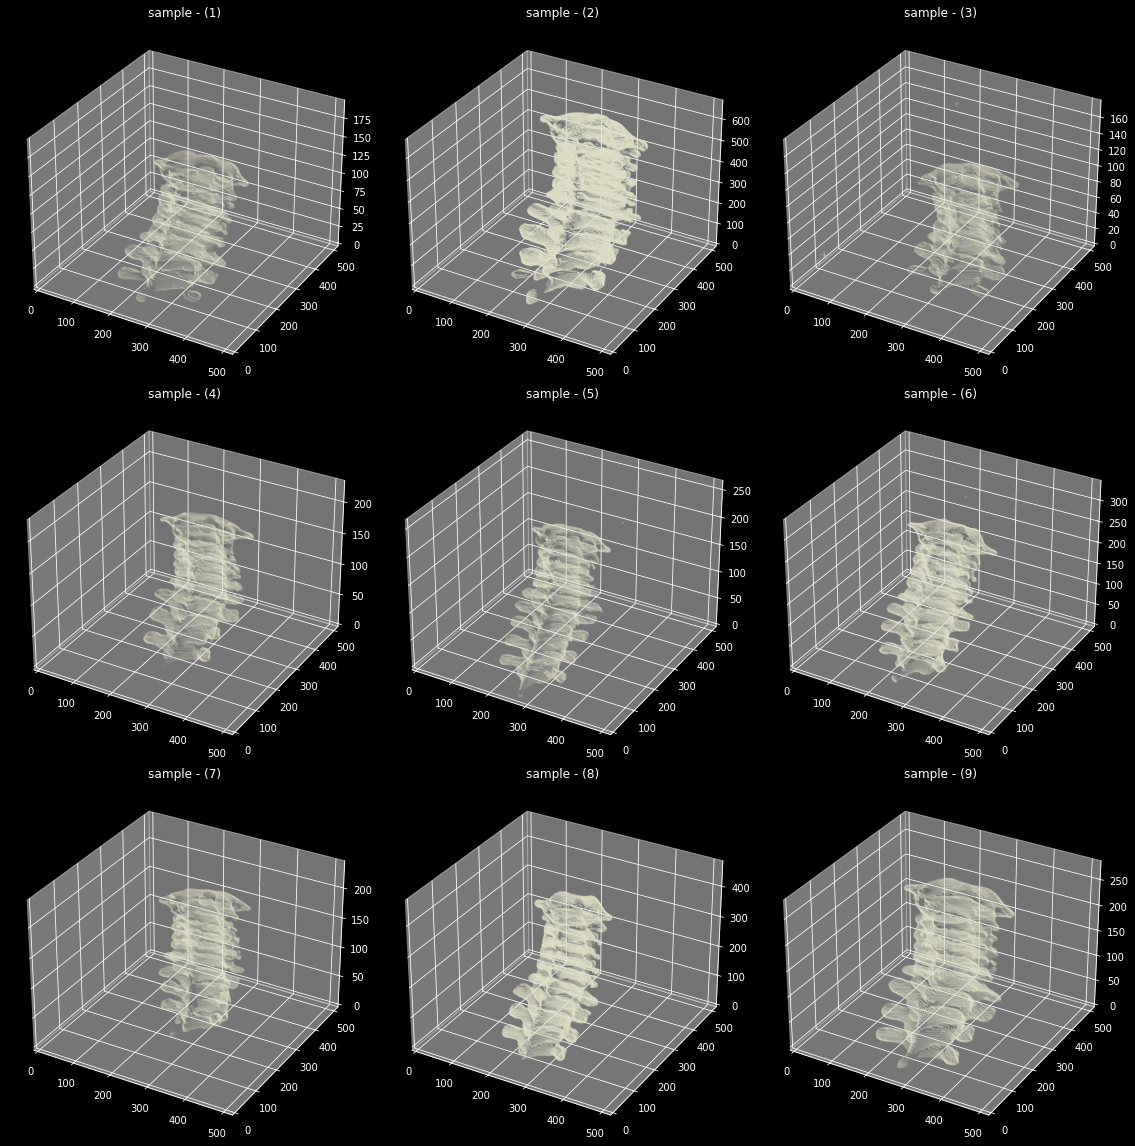

In [25]:
fig = plt.figure(figsize=(16,16))
for i in range(9):
    ax = fig.add_subplot(int(f'33{i+1}'), projection='3d')
    DrawMaskSample(nii_paths, i, ax)

plt.tight_layout()
plt.show()